## pre-requirements

- 라이브러리 설치
  - [깃허브-KcELECTRA](https://github.com/Beomi/KcELECTRA)
- 구글 드라이브 연결 



In [1]:
# for Torch DEBUG
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 14.9 MB/s 
     |████████████████████████████████| 6.6 MB 52.4 MB/s 
     |████████████████████████████████| 596 kB 64.5 MB/s 
     |████████████████████████████████| 101 kB 15.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 한국어 악성댓글 데이터셋
# !git clone https://github.com/ZIZUN/korean-malicious-comments-dataset

Cloning into 'korean-malicious-comments-dataset'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 15), reused 15 (delta 5), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import random
import numpy as np
import pandas as pd
# pytorch 사용할거라 tensorflow 임포트 안함

rand_seed = 42
random.seed(rand_seed)
np.random.seed(rand_seed)

In [4]:
from google.colab import drive
drive.mount('/gdrive')

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir("/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석")
!ls -l data

Mounted at /gdrive
total 63351
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
drwx------ 2 root root    4096 Jul 27 10:41 submissions
-rw------- 1 root root  188892 Jul 29 12:12 submission_v5.2_bert_hanspell.csv
-rw------- 1 root root  188892 Jul 29 12:36 submission_v5.3-bert_hanspell.csv
-rw------- 1 root root  188891 Jul 28 02:49 submission_v6_4.csv
-rw------- 1 root root  188891 Jul 28 03:16 submission_v6_5.csv
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 5322082 Jul 29 10:00 test_hanspell.csv
-rw------- 1 root root 8288753 Jul 24 11:11 test_mecab.csv
-rw------- 1 root root 7841571 Jul 24 11:35 test_okt.csv
-rw------- 1 root root 7650515 Jul 25 08:57 test_okt_stem.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 5390496 Jul 29 09:24 train_hanspell.csv
-rw------- 1 root root 8366728 Jul 24 11:09 train_mecab.csv
-rw------- 1 root root 7916589 Jul 24 11:29 train_okt.csv
-rw------- 1 root root 7726432 Jul 

## 전체 과정

1. ..
2. ..
3. ..

__참고자료__

- ['KcELECTRA'로 악성댓글 분류하기](https://www.dinolabs.ai/400) : Torch
- ['KcELECTRA'로 네이버 영화리뷰 감성분석](https://ainize.ai/workspace/view?ipynb=https://raw.githubusercontent.com/scy6500/KcELECTRA-NSMC/main/KcELECTRA%20NSMC.ipynb&imageId=HQ8gBR4qbSwEEgcoJL4G&utm_medium=social&utm_source=medium&utm_campaign=everyone%20ai&utm_content=kcelectra)

### KcELECTRA Performance

> 💡 NOTE 💡 

General Corpus로 학습한 KoELECTRA가 보편적인 task에서는 성능이 더 잘 나올 가능성이 높습니다.<br/>
KcBERT/KcELECTRA는 User genrated, Noisy text에 대해서 보다 잘 동작하는 PLM입니다.

|                    | Size<br/>(용량) | **NSMC**<br/>(acc) | **Naver NER**<br/>(F1) | **PAWS**<br/>(acc) | **KorNLI**<br/>(acc) | **KorSTS**<br/>(spearman) | **Question Pair**<br/>(acc) | **KorQuaD (Dev)**<br/>(EM/F1) |
| :----------------- | :-------------: | :----------------: | :--------------------: | :----------------: | :------------------: | :-----------------------: | :-------------------------: | :---------------------------: |
| **KcELECTRA-base** |      475M       |     **91.71**      |         86.90          |       74.80        |        81.65         |           82.65           |          **95.78**          |         70.60 / 90.11         |
| KcBERT-Base        |      417M       |       89.62        |         84.34          |       66.95        |        74.85         |           75.57           |            93.93            |         60.25 / 84.39         |
| KcBERT-Large       |      1.2G       |       90.68        |         85.53          |       70.15        |        76.99         |           77.49           |            94.06            |         62.16 / 86.64         |
| KoBERT             |      351M       |       89.63        |         86.11          |       80.65        |        79.00         |           79.64           |            93.93            |         52.81 / 80.27         |
| XLM-Roberta-Base   |      1.03G      |       89.49        |         86.26          |       82.95        |        79.92         |           79.09           |            93.53            |         64.70 / 88.94         |
| HanBERT            |      614M       |       90.16        |         87.31          |       82.40        |        80.89         |           83.33           |            94.19            |         78.74 / 92.02         |
| KoELECTRA-Base     |      423M       |       90.21        |         86.87          |       81.90        |        80.85         |           83.21           |            94.20            |         61.10 / 89.59         |
| KoELECTRA-Base-v2  |      423M       |       89.70        |         87.02          |       83.90        |        80.61         |           84.30           |            94.72            |         84.34 / 92.58         |
| KoELECTRA-Base-v3  |      423M       |       90.63        |       **88.11**        |     **84.45**      |      **82.24**       |         **85.53**         |            95.25            |       **84.83 / 93.45**       |
| DistilKoBERT       |      108M       |       88.41        |         84.13          |       62.55        |        70.55         |           73.21           |            92.48            |         54.12 / 77.80         |


In [ ]:
# https://velog.io/@jaeha0725/torch-seed-%EA%B0%92-%EA%B3%A0%EC%A0%95
"""
import torch
import torch.backends.cudnn as cudnn

# Torch 랜덤 시드 고정 ==> 하지말것!! 검증 정확도가 현저히 낮아짐
torch.manual_seed(rand_seed)
torch.cuda.manual_seed(rand_seed)
torch.cuda.manual_seed_all(rand_seed)
cudnn.benchmark = False
cudnn.deterministic = True
"""

In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

print(torch.__version__)

1.12.0+cu113


In [6]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [7]:
# !pip install wandb
# !wandb login
# API key: 145d9076018baf7d669870a83a0f3d9413857d2c

os.environ["WANDB_DISABLED"] = "true"

### 1. 데이터 로딩

- train_df 읽어오기
- reviews 전처리
  - 한글 자모음, 웹주소, 이메일, 전화번호 제거
  - 영어, 숫자, 특수문자 제거


In [8]:
# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 리뷰 평점 원본 데이터
file_path = f'{data_path}/train_hanspell.csv'

# 맞춤법/띄어쓰기 전처리 파일 
train_df = pd.read_csv(file_path)
print(train_df.shape)

train_df
# 24988 rows × 6 columns

(24988, 6)


,id,reviews,target,reviews_hanspell,tkn_size,chr_size
0,0,조아요 처음구입 싸게햇어요,2,좋아요 처음 구입 싸게 했어요,5,12
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데 천 원가량 주고 사기 너무 아깝네요,13,35
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인은 괜찮은데 상품이 금이 가서 교환했는데 두 번째 받은 상품도 까져있고 안쪽에...,19,64
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전에 이 제품 말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘...,36,102
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목을 잘 받쳐주네요,4,13
...,...,...,...,...,...,...
24983,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단 향이 너무너무 좋은데 지 속력만 좋다면 좋겠지만 워낙 저렴해 그래도 좋아요,12,33
24984,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다,9,34
24985,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향이 좋아요 다른 향도 시켜보고 싶어요,6,16
24986,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐보니 끝부분쯤에 정도 찢어져 있습니다 날짜 관계로 구냥 사용합니다,9,30


In [9]:
# 모델의 설정이 정수형 라벨을 필요로 해서 int형 label 컬럼을 생성 (모델 로딩시 num_labels=5 설정)
# - 내부적으로 label에 대해 원핫 인코딩 작업 수행함
train_df['label'] = train_df['target'].apply(lambda v: v-1)

# [0~4] label 확인 : num_classes=5
unq_labels, cnt_labels = np.unique(train_df['label'].values, return_counts=True)
print('labels =', dict(zip( unq_labels, cnt_labels )) )

train_df[['target','label']].dtypes

labels = {0: 4499, 1: 7994, 3: 2500, 4: 9995}


target    int64
label     int64
dtype: object

In [10]:
from sklearn.model_selection import train_test_split

# train, valid 분할
data = train_df[['reviews_hanspell','label']]
dataset_train, dataset_valid = train_test_split(data, test_size=0.2, random_state=42)

# 내용 확인
print(dataset_train.iloc[0])
print(dataset_train.iloc[-1])

reviews_hanspell    재구매 번째 구매 정말 맛있고 간편해
label                                  4
Name: 18840, dtype: object
reviews_hanspell    물건 잘 받았습니다 운동화처럼 생겼네요 안전화라서 쿠션감은 떨어집니다
label                                                    3
Name: 23654, dtype: object


### 2. KcELECTRA 로 전처리 

- 토크나이저 로딩
- 토크나이징 + 벡터화 + 패딩

In [11]:
model_name = 'beomi/KcELECTRA-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [12]:
# Setting parameters
max_len = 64          # 문장의 길이 (평균 13정도)
batch_size = 64
num_epochs = 5
log_interval = 200    # metrics 생성 시점

# 모델에 저장되어 있는 부분들
# learning_rate = 5e-5
# warmup_ratio = 0.1
# max_grad_norm = 1

In [15]:
# 학습 데이터
# ==> 토크나이징 + 패딩 : dim=64
encoded_train = tokenizer(
    dataset_train['reviews_hanspell'].tolist(),
    return_tensors='pt',
    max_length=max_len,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

# 확인
print( encoded_train[0].tokens )
print( encoded_train[0].ids )
print( encoded_train[0].attention_mask )
print()
print('디코딩 :',tokenizer.decode(encoded_train[0].ids))

['[CLS]', '재', '##구매', '번', '##째', '구매', '정말', '맛있', '##고', '간편', '##해', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[2, 2792, 24086, 1676, 5280, 11669, 8057, 27455, 4027, 29527, 4025, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

디코딩 : [CLS] 재구매 번째 구매 정말 맛있고 

In [16]:
# 검증 데이터
# ==> 토크나이징 + 패딩 : dim=64
encoded_valid = tokenizer(
    dataset_valid['reviews_hanspell'].tolist(),
    return_tensors='pt',
    max_length=max_len,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print('디코딩 :',tokenizer.decode(encoded_valid[0].ids))
print('디코딩 :',tokenizer.decode(encoded_valid[-1].ids))

디코딩 : [CLS] 풀이 스톤이 한 개가 다르게 들어있었어요 다른 던 다 똑같았어요 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
디코딩 : [CLS] 그냥저냥 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


3. KcELECTRA 로 텍스트 전처리

- Dataset 클래스 작성
- Dataset 생성



In [17]:
# y_train = np.array( dataset_train['label'].values, dtype='int' )
# y_valid = np.array( dataset_valid['label'].values, dtype='int' )

# 학습 시작 전에 label 데이터가 int형에 1차원인지 확인
print(dataset_train['label'].values.shape, dataset_train['label'].values.dtype)
print(dataset_valid['label'].values.shape, dataset_valid['label'].values.dtype, end='\n\n')
dataset_train['label'].values[0]

# 아닐 경우 ==> ValueError: 
# Target size (torch.Size([64])) must be the same as input size (torch.Size([64, 5]))

(19990,) int64
(4998,) int64



4

In [18]:
from torch.utils.data import Dataset, DataLoader

# 데이터셋 클래스
class ReviewDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = { key: torch.tensor(val[idx]) for key, val in self.encodings.items() }
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)


# 데이터셋 생성
train_dataset = ReviewDataset(encoded_train, dataset_train['label'].values)
valid_dataset = ReviewDataset(encoded_valid, dataset_valid['label'].values)

### 3. 모델 생성

- AutoModelForSequenceClassification
- 학습 파라미터 
  - wandb
- 측정 메트릭스
  - precision_recall_fscore_support 함수에서 average='weighted'
    - [multi-label 분류 문제에서 f1 score는 못 사용하는 걸까?](https://aimb.tistory.com/152)

__학습 측정치__

- epochs=5, max_len=64, hanspell 전처리 데이터 ==> **제출 acc 0.6685**

|Step|	Training Loss|	Validation Loss|	Acc|	F1|	Precision|	Recall|
|----|----|----|----|----|----|----|
|200	|0.874800	|0.755506	|0.675670	|0.635766	|0.608009	|0.675670|
|400	|0.714600	|0.741090	|0.696879	|0.659495	|0.651146	|0.696879|
|600	|0.674700	|0.730055	|0.698679	|0.650947	|0.660954	|0.698679|
|800	|0.587200	|0.785325	|0.684874	|0.670020	|0.661441	|0.684874|
|1000	|0.561900	|0.824220	|0.679872	|0.667984	|0.661331	|0.679872|
|1200	|0.484300	|0.845129	|0.681673	|0.669266	|0.662164	|0.681673|
|1400	|0.418500	|0.915961	|0.669468	|0.662132	|0.656407	|0.669468|

- epochs=5 ==> **제출 acc 0.6591**

|Step|	Training Loss|	Validation Loss|	Acc|	F1|	Precision|	Recall|
|----|----|----|----|----|----|----|
|200|	0.172100|	1.634539|	0.617247|	0.618473|	0.625467|	0.617247|
|400|	0.159200|	1.654786|	0.650860|	0.643516|	0.637916|	0.650860|
|600|	0.125500|	1.630619|	0.631853|	0.627805|	0.624225|	0.631853|
|800|	0.086000|	1.870700|	0.641657|	0.635299|	0.631096|	0.641657|
|1000|	0.074500|	2.012760|	0.642857|	0.637065|	0.633939|	0.642857|
|1200|	0.055200|	2.078029|	0.650660|	0.640178|	0.637454|	0.650660|
|1400|	0.039500|	2.198593|	0.644058|	0.640254|	0.638873|	0.644058|

- epochs=10

|Step|	Training Loss|	Validation Loss|	Acc|	F1|	Precision|	Recall|
|----|----|----|----|----|----|----|
|500|	0.777700|	0.749604|	0.685874|	0.641685|	0.638608|	0.685874|
|1000|	0.602700|	0.892312|	0.670468|	0.655054|	0.646385|	0.670468|
|1500|	0.427400|	1.009953|	0.659264|	0.645887|	0.637328|	0.659264|
|2000|	0.272900|	1.313081|	0.640456|	0.638909|	0.639873|	0.640456|
|2500|	0.173400|	1.477160|	0.633053|	0.634402|	0.638874|	0.633053|
|3000|	0.111800|	1.647965|	0.640256|	0.638743|	0.639817|	0.640256|

In [19]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)
model.to(device)

Some weights of the model checkpoint at beomi/KcELECTRA-base were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.bias', 'classifier.ou

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(50135, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [20]:
# 성능 시각화 wandb
# https://docs.wandb.ai/guides/integrations/huggingface

# for report_to
# import wandb
# wandb.init(project="review_ratings-kcelectra")

# 학습 파라미터
training_args = TrainingArguments(
    output_dir='./temp/electra',
    overwrite_output_dir='True',

    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
 
    logging_dir='./temp/logs',
    logging_steps=log_interval,
    evaluation_strategy="steps",
    eval_steps=log_interval,

    # https://discuss.huggingface.co/t/save-only-best-model-in-trainer/8442/8
    save_total_limit=2,
    save_strategy='no',
    load_best_model_at_end=False,

    # 성능 그래프 시각화 유틸리티 (사용안함)
    # report_to="wandb",
    # run_name="transformer-kcelectra_1"
)

#정확도 측정을 위한 함수 정의
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    # average: 'micro', 'macro', 'weighted' or 'samples' 
    # 참고 https://aimb.tistory.com/152
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'acc': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [21]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

# wandb.finish()   # 리포트 종료: report_to

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 19990
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1565
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


Step,Training Loss,Validation Loss,Acc,F1,Precision,Recall
200,0.874800,0.755506,0.675670,0.635766,0.608009,0.675670
400,0.714600,0.741090,0.696879,0.659495,0.651146,0.696879
600,0.674700,0.730055,0.698679,0.650947,0.660954,0.698679
800,0.587200,0.785325,0.684874,0.670020,0.661441,0.684874
1000,0.561900,0.824220,0.679872,0.667984,0.661331,0.679872
1200,0.484300,0.845129,0.681673,0.669266,0.662164,0.681673
1400,0.418500,0.915961,0.669468,0.662132,0.656407,0.669468


***** Running Evaluation *****
  Num examples = 4998
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
***** Running Evaluation *****
  Num examples = 4998
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than

TrainOutput(global_step=1565, training_loss=0.5956569342567517, metrics={'train_runtime': 1218.4041, 'train_samples_per_second': 82.034, 'train_steps_per_second': 1.284, 'total_flos': 3287332292409600.0, 'train_loss': 0.5956569342567517, 'epoch': 5.0})

In [22]:
trainer.evaluate(valid_dataset)

"""
{'epoch': 5.0,
 'eval_acc': 0.6546,
 'eval_f1': 0.6546,
 'eval_loss': 1.5792670249938965,
 'eval_precision': 0.6546,
 'eval_recall': 0.6546,
 'eval_runtime': 8.7521,
 'eval_samples_per_second': 571.294,
 'eval_steps_per_second': 9.026}

{'epoch': 10.0,
 'eval_acc': 0.6360544217687075,
 'eval_f1': 0.6368239894438272,
 'eval_loss': 1.6639291048049927,
 'eval_precision': 0.6398635203587097,
 'eval_recall': 0.6360544217687075,
 'eval_runtime': 9.6302,
 'eval_samples_per_second': 518.994,
 'eval_steps_per_second': 8.203}
 """

***** Running Evaluation *****
  Num examples = 4998
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


"\n{'epoch': 5.0,\n 'eval_acc': 0.6546,\n 'eval_f1': 0.6546,\n 'eval_loss': 1.5792670249938965,\n 'eval_precision': 0.6546,\n 'eval_recall': 0.6546,\n 'eval_runtime': 8.7521,\n 'eval_samples_per_second': 571.294,\n 'eval_steps_per_second': 9.026}\n\n{'epoch': 10.0,\n 'eval_acc': 0.6360544217687075,\n 'eval_f1': 0.6368239894438272,\n 'eval_loss': 1.6639291048049927,\n 'eval_precision': 0.6398635203587097,\n 'eval_recall': 0.6360544217687075,\n 'eval_runtime': 9.6302,\n 'eval_samples_per_second': 518.994,\n 'eval_steps_per_second': 8.203}\n "

### 5. 예측값 생성

- 데이터 로딩
- 전처리
- trainer.predict

In [23]:
import pandas as pd

data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 리뷰 평점 원본 로딩
test_df = pd.read_csv(f'{data_path}/test_hanspell.csv')
test_df

,id,reviews,reviews_hanspell,tkn_size,chr_size
0,0,채소가 약간 시들어 있어요,채소가 약간 시들어 있어요,4,11
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이 없어서 들어 올...,21,56
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,6,19
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 골드 주라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하자는 거임,14,31
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수도 없이 보내고 불량 배송비 원 청구하네요 완전별로 별 하나도 아까워요,11,31
...,...,...,...,...,...
24987,24995,사용해보니 좋아요~^^,사용해보니 좋아요,2,8
24988,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴한 가격에 질 좋고 핏좋고 너무 이쁘게 입고 다녀요,9,22
24989,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트 상품이라고 쓰여있어서 그런 줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 ...,27,80
24990,24998,역시 로네펠트!! 좋아요.,역시 로네펠트 좋아요,3,9


In [24]:
# 테스트 데이터
# ==> 토크나이징 + 패딩 : dim=32
encoded_test = tokenizer(
    test_df['reviews_hanspell'].tolist(),
    return_tensors='pt',
    max_length=max_len,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print('디코딩 :',tokenizer.decode(encoded_test[0].ids))
print('디코딩 :',tokenizer.decode(encoded_test[-1].ids))

디코딩 : [CLS] 채소가 약간 시들어 있어요 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
디코딩 : [CLS] 데생 디바 써보고 괜찮아서 비슷 한 줄 알았더니 완전 별로예요 언 더 주고 디바가 낫네요 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [25]:
# 데이터셋 생성
zero_labels = np.zeros(len(test_df), dtype=int)
test_dataset = ReviewDataset(encoded_test, zero_labels)

In [26]:
# https://huggingface.co/course/en/chapter3/3?fw=pt#evaluation

# 예측하기
predictions = trainer.predict(test_dataset)
print(predictions.predictions.shape, predictions.label_ids.shape)

***** Running Prediction *****
  Num examples = 24992
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(24992, 5) (24992,)


In [27]:
test_df['pred_target'] = np.array([ np.argmax(p)+1 for p in predictions.predictions ], dtype='int8')
test_df

,id,reviews,reviews_hanspell,tkn_size,chr_size,pred_target
0,0,채소가 약간 시들어 있어요,채소가 약간 시들어 있어요,4,11,2
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이 없어서 들어 올...,21,56,1
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,6,19,5
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 골드 주라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하자는 거임,14,31,1
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수도 없이 보내고 불량 배송비 원 청구하네요 완전별로 별 하나도 아까워요,11,31,1
...,...,...,...,...,...,...
24987,24995,사용해보니 좋아요~^^,사용해보니 좋아요,2,8,5
24988,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴한 가격에 질 좋고 핏좋고 너무 이쁘게 입고 다녀요,9,22,5
24989,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트 상품이라고 쓰여있어서 그런 줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 ...,27,80,1
24990,24998,역시 로네펠트!! 좋아요.,역시 로네펠트 좋아요,3,9,5


In [28]:
# [1~5] pred_target 확인
unq_labels, cnt_labels = np.unique(test_df['pred_target'].values, return_counts=True)
print('pred_target =', dict(zip( unq_labels, cnt_labels )) )

pred_target = {1: 3847, 2: 8586, 4: 1920, 5: 10639}


### 6. 모델 시각화 (실제값/예측값)

- 예측값 시각화
- 실제값 시각화

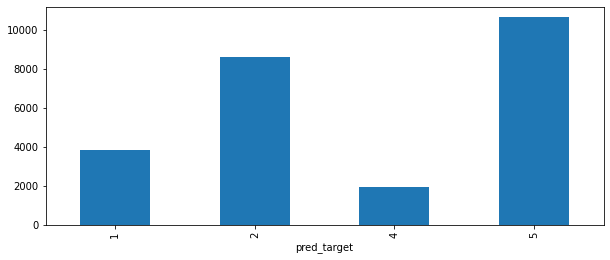

In [29]:
# 예측값 epochs=5 (with hanspell) 
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

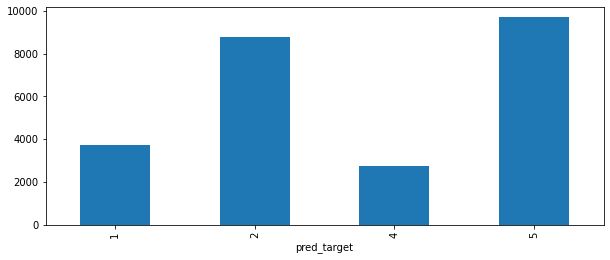

In [ ]:
# 예측값 epochs=5
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

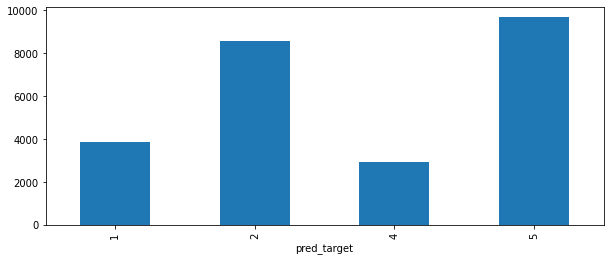

In [ ]:
# 예측값 epochs=10
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

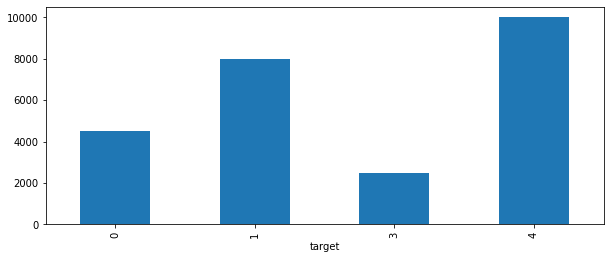

In [ ]:
# 훈련용 실제값
train_df.groupby('target').count()['id'].plot.bar(figsize=(10,4))

### 7. 예측값 저장 (제출용)

- sample_submissions 로딩
- test_df 병합
- submissions 저장

In [30]:
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 제출용 파일 불러오기
submission = pd.read_csv(f'{data_path}/sample_submission.csv') 
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      25000 non-null  int64
 1   target  25000 non-null  int64
dtypes: int64(2)
memory usage: 390.8 KB
None


In [31]:
# 예측값을 제출용 DF과 합치기 (NaN값 포함)

# left join: drop 된 rows 은 NaN 처리
submission_pred = pd.merge( 
    submission, 
    test_df[['id','pred_target']], 
    on='id',
    how='left'       # left, outer, right
    )
print('after MERGE:', submission_pred.shape )

# left join 으로 인한 NaN 조회
print(submission_pred.isna().sum())

# NaN 행 확인 (8개 행 맞음)
submission_pred[ submission_pred.isna().any(axis=1) ]

# merge 되면서 pred_target 이 float 로 바뀌었음 (왜지?)

# df1.join(df2) : 기본적으로 left join
# pd.merge(df1, df2, left_index=True, right_index=True) : 기본 inner join
# pd.concat([df1, df2], axis=1) : 기본 outer join

after MERGE: (25000, 3)
id             0
target         0
pred_target    8
dtype: int64


,id,target,pred_target
2989,2989,0,NaN
6621,6621,0,NaN
10889,10889,0,NaN
10901,10901,0,NaN
11422,11422,0,NaN
11881,11881,0,NaN
21228,21228,0,NaN
23708,23708,0,NaN


In [32]:
# NaN 값을 포함한 컬럼의 형 변환시에는
# nullable 가능한 pd.Int64Dtype() 으로 바꿔야 가능
submission_pred['target'] = submission_pred['pred_target'].astype('Int8')

# 기존 target 컬럼 삭제
submission_pred = submission_pred.drop(columns=['pred_target'])

# 확인
submission_pred.dtypes

# **참고: 컬럼 이름 변경 
# submission_pred = submission_pred.rename(columns={'pred_target' : 'target'})

id        int64
target     Int8
dtype: object

In [33]:
import pandas as pd
data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"
file_name="submission_v6.6-electra_hanspell"

# submission.csv 저장
submission_pred.to_csv(f'{data_path}/{file_name}.csv', index=False, encoding='utf-8')

# ==> 채점 0.647 ()

-rw------- 1 root root 188892 Jul 29 12:12 '/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/submission_v5.2_bert_hanspell.csv'
-rw------- 1 root root 188892 Jul 29 12:36 '/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/submission_v5.3-bert_hanspell.csv'
-rw------- 1 root root 188891 Jul 28 02:49 '/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/submission_v6_4.csv'
-rw------- 1 root root 188891 Jul 28 03:16 '/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/submission_v6_5.csv'
-rw------- 1 root root 188892 Jul 29 13:34 '/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/submission_v6.6-electra_hanspell.csv'


In [34]:
# 다운로드 (구글 드라이브에서 안보여도 가능)
from google.colab import files
files.download( f'{data_path}/{file_name}.csv' ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>